In [ ]:
#This path: /Documents/GitHub/Internship-2.0
#Regular expressions:
#dir = direction and mkdir = makes file
#cd = goes to this direction 
#cd .. = Goes one direction back 
#git add File= Adds something to GitHub 
#git commit-m "NAME OF THE CHANGE"= commits change to gitub--> Der Befehl git commit committet den Snapshot aus der Staging-Umgebung in den Projektverlauf.
#git push = pushes changes--> Per Push überträgst du Commits aus deinem lokalen Repository in ein Remote-Repository

In [45]:
#########################################################################################
####################################### Load Data #######################################
#########################################################################################
import numpy as np
import pickle 
import mne
import gc
import os
import matplotlib.pyplot as plt
from scipy.stats import median_absolute_deviation as mad
from scipy.stats import pearsonr
from mne.io.proj import _proj_equal
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from Definitions import *
from save_figures import *
from topo import *
%matplotlib qt

with open ('data_all.pkl', 'rb') as pickle_file:
    List_Conc_per_person = pickle.load(pickle_file)

In [32]:
##########################################################################################################################
####################################### Get evoked for each presented stimulus ###########################################
##########################################################################################################################
#https://mne.tools/0.15/generated/mne.viz.plot_compare_evokeds.html#mne.viz.plot_compare_evokeds
#https://mne.tools/stable/generated/mne.grand_average.html?highlight=grand_average#mne.grand_average

%matplotlib qt

#Get data: 
# print (List_Conc_per_person[0]['Ambiguous'])
#Get the times:
# Times= List_Conc_per_person [0].times
#Get channel names: 
# ch_names = List_Conc_per_person[0].ch_names

#Make itv_evoked and get returned itvs from each person- Ambiguous, Unambiguous, Low Noise and High Noise 
itv_Ambig, itv_Unambig, itv_LowNoise, itv_HighNoise = itv_evoked (List_Conc_per_person_alternative, List_Conc_per_person_alternative)

#Make the average (18 subjects)
Average_amb = mne.grand_average(itv_Ambig, interpolate_bads=True, drop_bads=True)
Average_unamb = mne.grand_average(itv_Unambig, interpolate_bads=True, drop_bads=True)
Average_LN = mne.grand_average(itv_LowNoise, interpolate_bads=True, drop_bads=True)
Average_HN = mne.grand_average(itv_HighNoise, interpolate_bads=True, drop_bads=True)
#mne.viz.plot_compare_evokeds 

#Plot a bit 
# Average_amb.plot_topo()
# Average_unamb.plot_topo()
# Average_LN.plot_topo()
# Average_HN.plot_topo()

#Plot and compare evokeds- works better using only one electrode not a list of electrodes
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  

dict_compare_Noise = {'Low Noise' : Average_LN, 
                      'High Noise': Average_HN,
                     }   
dict_compare_biguous = {'Ambiguous': Average_amb,
                    'Unambiguous': Average_unamb,
                    }

#mne.viz.plot_compare_evokeds(dict_compare_Noise)
#mne.viz.plot_compare_evokeds(dict_compare_Noise,  picks = Channel_Names)
#mne.viz.plot_compare_evokeds(dict_compare_biguous)

Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Identifying common channels ...
Interpolating bad channels
    A

In [ ]:
##############################################################################
############### Make topomap of ITV amb, unamb, LN, HN average ###############
##############################################################################
%matplotlib qt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

mne.viz.plot_evoked_topo(Average_amb, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_unamb, color='r',
                         axes=axes, legend=False)

# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Ambiguous', 'Unambiguous'], loc='lower right')


###Make topomap of Low noise average and high noise average to compare them###
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

mne.viz.plot_evoked_topo(Average_LN, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_HN, color='r',
                         axes=axes, legend=False)

# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Low Noise', 'High Noise'], loc='lower right')

In [4]:
### Look at Fp2 electrode ###
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names
Channel_Name = "Fp2"
Channel_Number = Channel_Names.index(Channel_Name)

# print (itv_Ambig[0].data.shape) --> 31x1001

for ii in range (len(itv_Ambig)):
    plt.figure ()
    plt.plot (itv_LowNoise[0].times, itv_LowNoise[ii].data[Channel_Number, :], c = 'r', label = 'LN')
    plt.plot (itv_HighNoise[0].times, itv_HighNoise[ii].data[Channel_Number, :], c = 'b', label = 'HN')
    plt.legend ()
    plt.grid ()

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...
<ipython-input-4-73aba724bd3c>:5: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)


pos_binned: (31, 2)


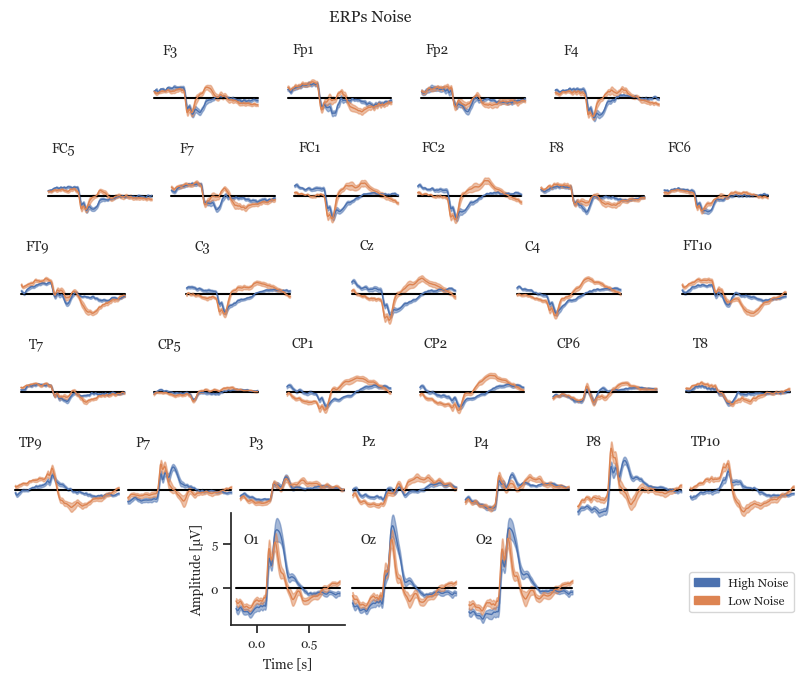

In [3]:
##########################################################################################################
#################################### TOPO PLOT FROM LUKAS AND MAREIKE ####################################
##########################################################################################################
#  
from topo import * #Also in Definitions 
import mne 
%matplotlib qt

condi = ['High Noise', 'Low Noise']
plot_topomap( [List_Conc_per_person_alternative], condition= condi, title='ERPs Noise', legend= ['High Noise', 'Low Noise'])

In [48]:
# From Lukas- to save the opend figure in a good format 
from save_figures import *
from matplotlib.backends.backend_pdf import PdfPages
multipage('C:/User path to the data')

saving fig Figure(900x696)



In [7]:
#############################################################################################
################################ Coefficient of variation ###################################
#############################################################################################
#To scale the date new --> using Root mean square to divide 
#Same as above- only data divided by RMS
%matplotlib qt


itv_Ambig_CV, itv_Unambig_CV, itv_LowNoise_CV, itv_HighNoise_CV = CV_evoked(List_Conc_per_person, List_Conc_per_person)

Average_amb_CV = mne.grand_average(itv_Ambig_CV, interpolate_bads=True, drop_bads=True)
Average_unamb_CV = mne.grand_average(itv_Unambig_CV, interpolate_bads=True, drop_bads=True)
Average_LN_CV = mne.grand_average(itv_LowNoise_CV, interpolate_bads=True, drop_bads=True)
Average_HN_CV = mne.grand_average(itv_HighNoise_CV, interpolate_bads=True, drop_bads=True)

## PLOT BELOW ##
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  

dict_compare_Noise_CV = {'Low Noise' : Average_LN_CV, 
                      'High Noise': Average_HN_CV,
                     }
dict_compare_biguous_CV = {'Ambiguous': Average_amb_CV,
                    'Unambiguous': Average_unamb_CV,
                    }

#mne.viz.plot_compare_evokeds(dict_compare_Noise_CV)
#mne.viz.plot_compare_evokeds(dict_compare_Noise_CV,  picks = Channel_Names)
#mne.viz.plot_compare_evokeds(dict_compare_biguous_CV)

NameError: name 'List_Conc_per_person' is not defined

In [ ]:
##########################################################################################################
############### Make topomap of ambiguous average and unambiguous average to compare them ################
################################################### CV ###################################################
##########################################################################################################
%matplotlib qt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
mne.viz.plot_evoked_topo(Average_amb_CV, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_unamb_CV, color='r',
                         axes=axes, legend=False)
# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Ambiguous', 'Unambiguous'], loc='lower right')


###Make topomap of Low noise average and high noise average to compare them###
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
mne.viz.plot_evoked_topo(Average_LN_CV, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_HN_CV, color='r',
                         axes=axes, legend=False)
# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Low Noise', 'High Noise'], loc='lower right')

In [ ]:
#########################################################################
######################### Difference of the itv #########################
#########################################################################
#.data = mean itv of amiguous 

Average_Ambig_CV = mne.grand_average (itv_Ambig_CV)
Average_Unambig_CV = mne.grand_average (itv_Unambig_CV)
Diff_CV = Average_Ambig_CV.copy()
Diff_CV.data = Average_Ambig_CV.data - Average_Unambig_CV.data

timepoint = 0.2

Diff_CV.plot_topomap([timepoint], cmap = 'jet')
Diff_CV.plot_topo()

In [46]:
####################################################################################################################################
######################### Variabilitätskoeffizient (Coefficient of variation) of the peaks- +/- 15 ms peak #########################
####################################################################################################################################
#Coefficient of variation = std/mean
#HERE: First step- Get ERPs from the "normal preprocessed data"
%matplotlib qt

#Makes mean over axis 1 --> 18 Werte- one per person-  shape (31, 1001) 
Evoked_Ambiguous, Evoked_Unambiguous, Evoked_LowNoise, Evoked_HighNoise = make_evoked_mean (List_Conc_per_person, List_Conc_per_person)

Average_amb = mne.grand_average(Evoked_Ambiguous, interpolate_bads=True, drop_bads=True)
Average_unamb = mne.grand_average(Evoked_Unambiguous, interpolate_bads=True, drop_bads=True)
Average_LN = mne.grand_average(Evoked_LowNoise, interpolate_bads=True, drop_bads=True)
Average_HN = mne.grand_average(Evoked_HighNoise, interpolate_bads=True, drop_bads=True)

dict_compare_Noise_VKplot = {'Low Noise' : Average_LN, 
                      'High Noise': Average_HN,
                     }
dict_compare_biguous_VKplot = {'Ambiguous': Average_amb,
                    'Unambiguous': Average_unamb,
                    }
mne.viz.plot_compare_evokeds(dict_compare_biguous_VKplot, picks = 'Cz')


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
mne.viz.plot_evoked_topo(Average_amb, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_unamb, color='r',
                         axes=axes, legend=False)
# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Ambiguous', 'Unambiguous'], loc='lower right')


###Make topomap of Low noise average and high noise average to compare them###
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
mne.viz.plot_evoked_topo(Average_LN, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_HN, color='r',
                         axes=axes, legend=False)
# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Low Noise', 'High Noise'], loc='lower right')

Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 3 sensors
Identifying common channels ...
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 3 sensors
Identifying common channels ...


In [47]:
####################################################
##### Investigate the P200 peak--> 150- 300 ms #####
####################################################

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)

# print (Evoked_Ambiguous[0].data.shape) --> 31x1001
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names
Channel_Name = "Cz"
Channel_Number = Channel_Names.index(Channel_Name)

#Kriti P200: ROI 150-300 ms
####TIME RANGE####
time_range = (0.15, 0.3)
pnt_range = np.arange(*[np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[0])), np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[1]))])
print (pnt_range)

P_200 = 425
P_200_Low = P_200 - 75
P_200_high = P_200 + 75
P_200_high_new = P_200 + 25

VK_amb = []
VK_unamb = []
# Intervall_amb
# Intervall_unamb

for ii in range (len (List_Conc_per_person)):
    person = ii
    Time_slice = Evoked_LowNoise[person].data[Channel_Number, P_200_Low:P_200_high ]
    peak_indices, properties = find_peaks (Time_slice)
    peak_indices += P_200_Low
    #print (peak_indices)
    Max_Value = peak_indices [np.argmax(Evoked_LowNoise[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_LowNoise[person].data[Channel_Number, Max_Value]                                      #Value max-value
    
    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii] ["Low Noise"].get_data()[ : , Channel_Number, Max_Value]) / List_Conc_per_person[ii] ["Low Noise"].average().data[ Channel_Number , Max_Value]
    VK_amb.append(cv)

    # plt.figure()
    # plt.plot( Evoked_Ambiguous[person].times, Evoked_Ambiguous[person].data [Channel_Number, : ] )
    # plt.scatter( List_Conc_per_person[person].times[Max_Value], Evoked_Ambiguous[person].data [Channel_Number, Max_Value], color='r')


for ii in range (len (List_Conc_per_person)):
    person = ii
    Time_slice = Evoked_HighNoise[person].data[Channel_Number, P_200_Low:P_200_high]
    # if ii == 14:
    #     Time_slice_U = Evoked_HighNoise[person].data[Channel_Number, P_200_Low:P_200_high_new]
    peak_indices, properties = find_peaks (Time_slice)
    peak_indices += P_200_Low
    Max_Value_unamb = peak_indices [np.argmax(Evoked_HighNoise[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_HighNoise[person].data[Channel_Number, Max_Value]                                            #Value max-value

    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii]["High Noise"].get_data()[ : , Channel_Number, Max_Value_unamb]) / List_Conc_per_person[ii]["High Noise"].average().data[ Channel_Number ,       Max_Value_unamb]
    VK_unamb.append(cv)

    # plt.figure()
    # plt.plot( Evoked_Unambiguous[person].times, Evoked_Unambiguous[person].data [Channel_Number, : ] )
    # plt.scatter( List_Conc_per_person[person].times[Max_Value_unamb], Evoked_Unambiguous[person].data [Channel_Number, Max_Value_unamb], color='r')

plt.figure ()
plt.scatter (np.arange(1, 19, 1), VK_amb, c = 'b', label = 'LN- Highest peak')
#plt.scatter (np.arange(1, 500, 1), VK_Unambiguous, c = 'r', label = 'Unambiguous- P200')
plt.scatter (np.arange(1, 19, 1), VK_unamb, c = 'r', label = 'HN- Highest peak')
plt.xlabel ('Person')
plt.ylabel ('CV = std/mean')
plt.title ('CV analysis- P200')
plt.xticks (np.arange(1, 19, 1))
plt.legend()

#T-Test:
ttest_rel(VK_amb, VK_unamb)

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...
<ipython-input-47-aca6b88c8a79>:16: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
[350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 

Ttest_relResult(statistic=-0.43245655874790234, pvalue=0.6708455637073372)

In [14]:
####################################################
##### Investigate the P200 peak--> 150- 300 ms #####
####################################################
#Both conditions in one plot to compare 

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="ticks", color_codes=True)

# print (Evoked_Ambiguous[0].data.shape) --> 31x1001
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names
Channel_Name = "Cz"
Channel_Number = Channel_Names.index(Channel_Name)

#Kritis Grenzen P200: ROI 150-300
####TIME RANGE####
#Alte Grenzen: Von 350- -70& +150
time_range = (0.15, 0.3)
pnt_range = np.arange(*[np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[0])), np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[1]))])
print (pnt_range)

P_200 = 425
P_200_Low = P_200 - 75
P_200_high = P_200 + 75
P_200_high_new = P_200 + 25

VK_amb = []
VK_unamb = []
# Intervall_amb
# Intervall_unamb

for ii in range (len (List_Conc_per_person)):
    person = ii
    Time_slice = Evoked_Ambiguous[person].data[Channel_Number, P_200_Low:P_200_high ]
    peak_indices, properties = find_peaks (Time_slice)
    peak_indices += P_200_Low
    #print (peak_indices)
    Max_Value = peak_indices [np.argmax(Evoked_Ambiguous[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_Ambiguous[person].data[Channel_Number, Max_Value]                                      #Value max-value
    
    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii] ["Ambiguous"].get_data()[ : , Channel_Number, Max_Value]) / List_Conc_per_person[ii] ["Ambiguous"].average().data[ Channel_Number , Max_Value]
    VK_amb.append(cv)

    Time_slice_U = Evoked_Unambiguous[person].data[Channel_Number, P_200_Low:P_200_high]
    if ii == 14:
        Time_slice_U = Evoked_Unambiguous[person].data[Channel_Number, P_200_Low:P_200_high_new]
    peak_indices_U, properties_U = find_peaks (Time_slice_U)
    peak_indices_U += P_200_Low
    Max_Value_unamb = peak_indices_U [np.argmax(Evoked_Unambiguous[person].data[Channel_Number, peak_indices_U])]         #Index max-value
    Trial_one_U = Evoked_Unambiguous[person].data[Channel_Number, Max_Value_unamb]                                            #Value max-value

    #timepoints_15 = []
    cv_U = np.std(List_Conc_per_person[ii]["Unambiguous"].get_data()[ : , Channel_Number, Max_Value_unamb]) / List_Conc_per_person[ii]["Unambiguous"].average().data[ Channel_Number, Max_Value_unamb]
    VK_unamb.append(cv_U)

    plt.figure()
    plt.plot( Evoked_Unambiguous[person].times, Evoked_Unambiguous[person].data [Channel_Number, : ], label = 'Unambiguous')
    plt.scatter( List_Conc_per_person[person].times[Max_Value_unamb], Evoked_Unambiguous[person].data [Channel_Number, Max_Value_unamb], color='r')
    plt.plot( Evoked_Ambiguous[person].times, Evoked_Ambiguous[person].data [Channel_Number, : ], c = 'y', label = 'Ambiguous')
    plt.scatter( List_Conc_per_person[person].times[Max_Value], Evoked_Ambiguous[person].data [Channel_Number, Max_Value], color='r')
    plt.legend()
    plt.title('CV Person')


#T-Test:
ttest_rel(VK_amb, VK_unamb)

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...
<ipython-input-14-db54287a2ab2>:17: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
[350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 

Ttest_relResult(statistic=3.209427299876319, pvalue=0.005142167015800488)

In [14]:
#PLOT using PANDAS& SEABORN
import pandas as pd
Liste = []
x = np.arange(1, 19, 1)
for ii in range (len(x)):
    Liste.append(ii+1)
Liste_plot = Liste + Liste

Ambiguity_Liste = []
for ii in range (len(x)):
    Ambiguity_Liste.append('LN')
for ii in range (len(x)):
    Ambiguity_Liste.append('HN')


Long_array = VK_amb + VK_unamb
Long_array = np.abs(Long_array)
df = pd.DataFrame(Long_array, columns=['CV'])
df['Person'] = Liste_plot
df['Noise'] = Ambiguity_Liste

sns.catplot(x="Noise", y="CV", hue="Person", kind="point", data=df)

data = np.stack([np.abs(VK_amb), np.abs(VK_unamb)], axis=-1)
df1 = pd.DataFrame(data, columns=['LN', 'HN'])
sns.catplot (data = df1, jitter = False)

#sns.ylabel ('CV = std/mean')

# tips = sns.load_dataset("tips")
# sns.catplot(x="day", y="total_bill", data=tips)

# unamb = np.random.randn(18)
# amb = np.random.randn(18) + 1
# data = np.stack([unamb, amb], axis=-1)
# data = df)

# # tips = sns.load_dataset("tips")
# # sns.catplot(x="day", y="total_bill", data=tips))

# sns.catplot(data=df)

In [48]:
#Looking at an earlier component at Oz - 140-200ms 

Channel_Name = "Oz"
Channel_Number = Channel_Names.index(Channel_Name)

####TIME RANGE####
time_range = (0.1, 0.19)
pnt_range = np.arange(*[np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[0])), np.argmin(np.abs(Evoked_Ambiguous[0].times - time_range[1]))])
#print (pnt_range)

VK_amb_small = []
VK_unamb_small = []
# Intervall_amb
# Intervall_unamb

for ii in range (len (List_Conc_per_person)):
    person = ii
    Time_slice = Evoked_Ambiguous[person].data[Channel_Number, pnt_range ]
    peak_indices, properties = find_peaks (Time_slice)
    peak_indices += pnt_range[0]
    #print (peak_indices)
    Max_Value = peak_indices [np.argmax(Evoked_Ambiguous[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_Ambiguous[person].data[Channel_Number, Max_Value]                                      #Value max-value
    
    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii] ["Ambiguous"].get_data()[ : , Channel_Number, Max_Value]) / List_Conc_per_person[ii] ["Ambiguous"].average().data[ Channel_Number , Max_Value]
    VK_amb_small.append(cv)

    # plt.figure()
    # plt.plot( Evoked_Ambiguous[person].times, Evoked_Ambiguous[person].data [Channel_Number, : ] )
    # plt.scatter( List_Conc_per_person[person].times[Max_Value], Evoked_Ambiguous[person].data [Channel_Number, Max_Value], color='r')


for ii in range (len (List_Conc_per_person)):
    person = ii
    Time_slice = Evoked_Unambiguous[person].data[Channel_Number, pnt_range]
    peak_indices, properties = find_peaks (Time_slice)
    peak_indices += pnt_range[0]
    Max_Value_unamb = peak_indices [np.argmax(Evoked_Unambiguous[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_Unambiguous[person].data[Channel_Number, Max_Value]                                            #Value max-value

    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii]["Unambiguous"].get_data()[ : , Channel_Number, Max_Value_unamb]) / List_Conc_per_person[ii]["Unambiguous"].average().data[ Channel_Number ,       Max_Value_unamb]
    VK_unamb_small.append(cv)

    # plt.figure()
    # plt.plot( Evoked_Unambiguous[person].times, Evoked_Unambiguous[person].data [Channel_Number, : ] )
    # plt.scatter( List_Conc_per_person[person].times[Max_Value_unamb], Evoked_Unambiguous[person].data [Channel_Number, Max_Value_unamb], color='r')

plt.figure ()
plt.scatter (np.arange(1, 19, 1), VK_amb_small, c = 'b', label = 'Ambiguous- Highest peak')
# #plt.scatter (np.arange(1, 500, 1), VK_Unambiguous, c = 'r', label = 'Unambiguous- P200')
plt.scatter (np.arange(1, 19, 1), VK_unamb_small, c = 'r', label = 'Unambiguous- Highest peak')
plt.xlabel ('Person')
plt.ylabel ('CV = std/mean')
plt.title ('CV analysis- 100-190ms')
plt.xticks (np.arange(1, 19, 1))
plt.legend()

# #T-Test:
ttest_rel(VK_amb_small, VK_unamb_small)

Ttest_relResult(statistic=-0.45915786607766174, pvalue=0.6519374207711424)

In [49]:
#PLOT PANDAS& SEABORN
import pandas as pd

data = np.stack([VK_amb_small, VK_unamb_small], axis=-1)
df = pd.DataFrame(data, columns=['Ambiguous', 'Unambiguous'])
# x = np.arange(1, 19, 1)
# y = VK_amb

sns.catplot (data = df, jitter = False)

Liste = []
x = np.arange(1, 19, 1)
for ii in range (len(x)):
    Liste.append(ii+1)
Liste_plot = Liste + Liste

Ambiguity_Liste = []
for ii in range (len(x)):
    Ambiguity_Liste.append('Ambiguous')
for ii in range (len(x)):
    Ambiguity_Liste.append('Unambiguous')


Long_array = VK_amb_small + VK_unamb_small
df = pd.DataFrame(Long_array, columns=['CV'])
df['Person'] = Liste_plot
df['Ambiguity'] = Ambiguity_Liste

sns.catplot(x="Ambiguity", y="CV", hue="Person", kind="point", data=df)

data = np.stack([VK_amb_small, VK_unamb_small], axis=-1)
df1 = pd.DataFrame(data, columns=['Ambiguous', 'Unambiguous'])
sns.catplot (data = df1, jitter = False)
#sns.ylabel ('CV = std/mean')

# tips = sns.load_dataset("tips")
# sns.catplot(x="day", y="total_bill", data=tips)

# unamb = np.random.randn(18)
# amb = np.random.randn(18) + 1
# data = np.stack([unamb, amb], axis=-1)
# data = df)

# # tips = sns.load_dataset("tips")
# # sns.catplot(x="day", y="total_bill", data=tips))

# sns.catplot(data=df)

In [50]:
#NOISE peak- at Oz using FWHM
#Only LN- HN below 

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Grand Average bilden:
# Average_amb 
# Average_unamb 
# Average_LN 
# Average_HN 

BED = Average_LN
Channel_Name = "Oz"
Channel_Number = Channel_Names.index(Channel_Name)

P_200 = 350
P_200_Low = P_200 - 70
P_200_high = P_200 + 150
# To get Max_Value 
Time_slice_Average = BED.data[Channel_Number, P_200_Low : P_200_high ]
peak_indices, properties = find_peaks (Time_slice_Average)
#print ('peak indices 1', peak_indices)
peak_indices += P_200_Low
#print ('peak_indices', peak_indices)
Max_idx = peak_indices [np.argmax(BED.data[Channel_Number, peak_indices])]         #Index max-value
print ('Max_Value', Max_idx)
Max_Value = BED.data[Channel_Number, Max_idx]   

#FWHM:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y) / 2
    print ('HALF', half)
    signs = np.sign(np.add(y, -half))
    print ('signs', signs)
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    print (zero_crossings_i)
    FWHM_Start = int
    for ii in range (len(zero_crossings_i)):
        if zero_crossings_i[ii] <= Max_idx:
            FWHM_Start = ii
            Idx_FWHM_LN_Oz.append(zero_crossings_i[FWHM_Start])
            Idx_FWHM_LN_Oz.append(zero_crossings_i[FWHM_Start + 1])
    #print ('FWHM_Start', FWHM_Start)
    return [lin_interp(x, y, zero_crossings_i[FWHM_Start], half),
            lin_interp(x, y, zero_crossings_i[FWHM_Start + 1], half)]

Idx_FWHM_LN_Oz = []

x = List_Conc_per_person[0].times
y = Average_LN.data [Channel_Number, :]

hmx = half_max_x(x,y)
#print ('hmx 1 und null', hmx[1], hmx[0])
#print ('hmx:', hmx)
fwhm = hmx[1] - hmx[0]
#print("FWHM:{:.3f}".format(fwhm))
half = max(y)/2.0
#print ('half', half)
# print ('HN', Idx_FWHM_HN_Oz)
print ('LN', Idx_FWHM_LN_Oz)

VK_LN = []
# Intervall_amb
# Intervall_unamb

for ii in range (len (List_Conc_per_person)):
    person = ii
    print (ii)

    Time_slice = Evoked_LowNoise[person].data[Channel_Number, Idx_FWHM_LN_Oz[0]-1 : Idx_FWHM_LN_Oz[1] ]
    print ('Time slice', Time_slice)
    peak_indices, properties = find_peaks (Time_slice)
    print ('Peak indices', peak_indices)
    peak_indices += Idx_FWHM_LN_Oz[0]
    print ('Peak indices 2', peak_indices)
    # if len(peak_indices) == 0:
    #     peak_indices = np.argmax(Evoked_LowNoise[person].data[Channel_Number, :])
    #     print ('Peaky one', peak_indices)
    #     # peak_indices[np.argmax(x[peak_indices])]
    #print (peak_indices)

    Max_Value = peak_indices [np.argmax(Evoked_LowNoise[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_LowNoise[person].data[Channel_Number, Max_Value]                                      #Value max-value

    # plt.figure()
    # plt.plot( Evoked_LowNoise[person].times, Evoked_LowNoise[person].data [Channel_Number, : ] )
    # plt.scatter( List_Conc_per_person[person].times[Max_Value], Evoked_LowNoise[person].data [Channel_Number, Max_Value], color='r')
    
    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii] ["Low Noise"].get_data()[ : , Channel_Number, Max_Value]) / List_Conc_per_person[ii] ["Low Noise"].average().data[ Channel_Number , Max_Value]
    VK_LN.append(cv)

# search in this time interval the peak at Cz for every person & condition and calculate CV 


# Find peak funktion---> get index with highest value
# argmax if array is empty

Max_Value 378
HALF 3.392652361064171e-06
signs [-1. -1. -1. ... -1. -1. -1.]
[344 417]
LN [344, 417]
0
Time slice [-5.60926312e-07 -4.23145006e-07 -2.83719447e-07 -1.45282856e-07
 -9.78334083e-09  1.21558889e-07  2.48246628e-07  3.70449759e-07
  4.88903306e-07  6.04773187e-07  7.19509943e-07  8.34703270e-07
  9.51936260e-07  1.07264361e-06  1.19799123e-06  1.32879115e-06
  1.46544920e-06  1.60793710e-06  1.75579175e-06  1.90814662e-06
  2.06378428e-06  2.22120184e-06  2.37869026e-06  2.53441659e-06
  2.68650060e-06  2.83308744e-06  2.97240868e-06  3.10282903e-06
  3.22289044e-06  3.33135177e-06  3.42721420e-06  3.50973347e-06
  3.57842053e-06  3.63303380e-06  3.67357275e-06  3.70027419e-06
  3.71360356e-06  3.71424027e-06  3.70305762e-06  3.68109476e-06
  3.64952511e-06  3.60962100e-06  3.56270667e-06  3.51010383e-06
  3.45308050e-06  3.39280486e-06  3.33030422e-06  3.26643091e-06
  3.20183600e-06  3.13695240e-06  3.07199149e-06  3.00695843e-06
  2.94168455e-06  2.87586989e-06  2.80914

In [51]:
##########################################
###### Same as above for High Noise ######
##########################################

BED = Average_HN
Channel_Name = "Oz"
Channel_Number = Channel_Names.index(Channel_Name)

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y) / 2
    print ('HALF', half)
    signs = np.sign(np.add(y, -half))
    print ('signs', signs)
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    print (zero_crossings_i)
    FWHM_Start = int
    for ii in range (len(zero_crossings_i)):
        if zero_crossings_i[ii] <= Max_idx:
            FWHM_Start = ii
            Idx_FWHM_HN_Oz.append(zero_crossings_i[FWHM_Start])
            Idx_FWHM_HN_Oz.append(zero_crossings_i[FWHM_Start + 1])
    #print ('FWHM_Start', FWHM_Start)
    return [lin_interp(x, y, zero_crossings_i[FWHM_Start], half),
            lin_interp(x, y, zero_crossings_i[FWHM_Start + 1], half)]

Idx_FWHM_HN_Oz = []

x = List_Conc_per_person[0].times
y = Average_HN.data [Channel_Number, :]

hmx = half_max_x(x,y)
#print ('hmx 1 und null', hmx[1], hmx[0])
#print ('hmx:', hmx)
fwhm = hmx[1] - hmx[0]
#print("FWHM:{:.3f}".format(fwhm))
half = max(y)/2.0
#print ('half', half)
print ('HN', Idx_FWHM_HN_Oz)
print (Idx_FWHM_HN_Oz[0], Idx_FWHM_HN_Oz[1])

VK_HN = []

for ii in range (len (List_Conc_per_person)):
    person = ii
    print (ii)
    # plt.figure()
    # plt.plot( Evoked_HighNoise[person].times, Evoked_HighNoise[person].data [Channel_Number, : ] )

    Time_slice = Evoked_HighNoise[person].data[Channel_Number, Idx_FWHM_HN_Oz[0] : Idx_FWHM_HN_Oz[1]]
    print (Time_slice)
    peak_indices, properties = find_peaks (Time_slice)
    print ('Time slice', Time_slice)
    print ('Peak indices', peak_indices)
    peak_indices += Idx_FWHM_HN_Oz[0]
    print ('Peak indices 2', peak_indices)
    Max_Value = peak_indices [np.argmax(Evoked_HighNoise[person].data[Channel_Number, peak_indices])]         #Index max-value
    Trial_one = Evoked_HighNoise[person].data[Channel_Number, Max_Value]                                      #Value max-value
    
    #timepoints_15 = []
    cv = np.std(List_Conc_per_person[ii] ["High Noise"].get_data()[ : , Channel_Number, Max_Value]) / List_Conc_per_person[ii] ["High Noise"].average().data[ Channel_Number , Max_Value]
    VK_HN.append(cv)

HALF 4.515589781929743e-06
signs [-1. -1. -1. ... -1. -1. -1.]
[347 473]
HN [347, 473]
347 473
0
[1.42712560e-06 1.59735889e-06 1.76616101e-06 1.93405246e-06
 2.10227769e-06 2.27264300e-06 2.44731309e-06 2.62859152e-06
 2.81869858e-06 3.01955289e-06 3.23257081e-06 3.45850620e-06
 3.69734668e-06 3.94826799e-06 4.20963924e-06 4.47907834e-06
 4.75356046e-06 5.02957518e-06 5.30331428e-06 5.57086832e-06
 5.82842060e-06 6.07243699e-06 6.29984308e-06 6.50816190e-06
 6.69559749e-06 6.86107973e-06 7.00427817e-06 7.12557248e-06
 7.22597964e-06 7.30705299e-06 7.37076551e-06 7.41937679e-06
 7.45528874e-06 7.48090829e-06 7.49853029e-06 7.51024452e-06
 7.51786229e-06 7.52285759e-06 7.52632961e-06 7.52900226e-06
 7.53126013e-06 7.53319693e-06 7.53466234e-06 7.53531793e-06
 7.53471058e-06 7.53234960e-06 7.52776789e-06 7.52056850e-06
 7.51046755e-06 7.49733036e-06 7.48118728e-06 7.46222322e-06
 7.44074824e-06 7.41715915e-06 7.39190261e-06 7.36544045e-06
 7.33820418e-06 7.31054433e-06 7.28269325e-06 7.2

In [11]:
# PLOT to check the HN and LN early peak

print (VK_LN)
plt.figure ()
plt.scatter (np.arange(1, 19, 1), np.abs(VK_LN), c = 'b', label = 'Low Noise- FWHM')
# #plt.scatter (np.arange(1, 500, 1), VK_Unambiguous, c = 'r', label = 'Unambiguous- P200')
plt.scatter (np.arange(1, 19, 1), VK_HN, c = 'r', label = 'High Noise- FWHM')
plt.xlabel ('Person')
plt.ylabel ('CV = std/mean')
plt.title ('CV analysis')
plt.xticks (np.arange(1, 19, 1))
plt.legend()

ttest_rel(VK_LN, VK_HN)

[1.6503912796952998, 1.4279807727709857, 0.447395486658812, 1.1356520178140894, 0.6155176811911076, 0.9074524674895829, 2.4325743068313392, 0.812713072517002, 0.6230426299167919, 0.5446318786256883, 3.4590782420360013, 1.6207344916331996, 1.2338009446500022, 0.7633492819940944, 0.7108065970682788, -36.89138543693876, 0.8447043014799854, 0.3896633618129671]


Ttest_relResult(statistic=-0.8324705330933408, pvalue=0.4166853535053221)

In [54]:
#PLOT PANDAS& SEABORN

import pandas as pd

data = np.stack([np.abs(VK_LN), VK_HN], axis=-1)
df = pd.DataFrame(data, columns=['High Noise', 'Low Noise'])
# x = np.arange(1, 19, 1)
# y = VK_amb

#sns.catplot (data = df, jitter = False)
#sns.ylabel ('CV = std/mean')

Liste = []
x = np.arange(1, 19, 1)
for ii in range (len(x)):
    Liste.append(ii+1)
Liste_plot = Liste + Liste

Noise_Liste = []
for ii in range (len(x)):
    Noise_Liste.append('High Noise')
for ii in range (len(x)):
    Noise_Liste.append('Low Noise')


Long_array = VK_HN + VK_LN
Long_array = np.abs(Long_array)
df = pd.DataFrame(Long_array, columns=['CV'])
df['Person'] = Liste_plot
df['Noise'] = Noise_Liste

sns.catplot(x="Noise", y="CV", hue="Person", kind="point", data=df)


# data = np.stack([np.abs(VK_LN), VK_HN], axis=-1)
# df1 = pd.DataFrame(data, columns=['Low Noise', 'High Noise'])
# sns.catplot (data = df1, jitter = False)

# tips = sns.load_dataset("tips")
# sns.catplot(x="day", y="total_bill", data=tips)

# unamb = np.random.randn(18)
# amb = np.random.randn(18) + 1
# data = np.stack([unamb, amb], axis=-1)
# data = df)

# # tips = sns.load_dataset("tips")
# # sns.catplot(x="day", y="total_bill", data=tips))

# sns.catplot(data=df)

In [ ]:
############################################################################################
###################################### Lukas Plot ##########################################
############################################################################################
from viz import *
%matplotlib qt
        
#Choose channel name to compare 
ch_name = "Cz"

#Lukas Plot Ambiguous Vs. Unamboguous 
Amb_itv_plot = itv_Ambig_CV
Matrix_amb = np.zeros ((18,1001))
ch_idx = Amb_itv_plot[0].ch_names.index(ch_name)
for i, itv in enumerate (Amb_itv_plot):
    subject_itv_ch = Amb_itv_plot[i].data[ch_idx, :]
    Matrix_amb [i, :] = subject_itv_ch

Unamb_itv_plot = itv_Unambig_CV
Matrix_unamb = np.zeros ((18,1001))
ch_idx = Unamb_itv_plot[0].ch_names.index(ch_name)
for i, itv in enumerate (Unamb_itv_plot):
    subject_itv_ch = Unamb_itv_plot[i].data[ch_idx, :]
    Matrix_unamb [i, :] = subject_itv_ch
    
times_plot = itv_Ambig_CV[0].times
Y1 = Matrix_amb
Y2 = Matrix_unamb


#Lukas Plot mit Low Noise Vs. High Noise
LN_itv_plot = itv_LowNoise_CV
Matrix_LN = np.zeros ((18,1001))
ch_idx = LN_itv_plot[0].ch_names.index(ch_name)
for i, itv in enumerate (LN_itv_plot):
    subject_itv_ch = LN_itv_plot[i].data[ch_idx, :]
    Matrix_LN [i, :] = subject_itv_ch

HN_itv_plot = itv_HighNoise_CV
Matrix_HN = np.zeros ((18,1001))
ch_idx = HN_itv_plot[0].ch_names.index(ch_name)
for i, itv in enumerate (HN_itv_plot):
    subject_itv_ch = HN_itv_plot[i].data[ch_idx, :]
    Matrix_HN [i, :] = subject_itv_ch

X1 = Matrix_LN
X2 = Matrix_HN

In [ ]:
#Ambiguous Vs. Unambiguous
#-> Plot Y-axis VOLT- mV
plot_two_with_error (times_plot, Y1, Y2, test = 'wilc', labels = ['Ambiguous', 'Unambiguous'], ylabel= "Amplitude [\u03BCV]", xlabel= "Time [s]", title = ch_name, paired = True)

In [ ]:
#Omni stat- Lukas function for statistic tests:

omni_stat (test_Y1, test_Y2)

In [1]:
# Load alternative Data: 
import numpy as np
import pickle 
import mne
import gc
import os
import matplotlib.pyplot as plt
from scipy.stats import median_absolute_deviation as mad
from scipy.stats import pearsonr
from mne.io.proj import _proj_equal
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from Definitions import *
from save_figures import *
from topo import *
%matplotlib qt

with open ('data_all_alternative.pkl', 'rb') as pickle_file:
    List_Conc_per_person_alternative = pickle.load(pickle_file)

In [20]:
#######################################################################################
###################################### Quenching ######################################
#######################################################################################
from quench import * 
import os
import pickle 
import numpy as np
import mne
import matplotlib.pyplot as plt
from copy import deepcopy
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from Definitions import *
%matplotlib qt

# Load Data: 
# with open ('data_all_alternative.pkl', 'rb') as pickle_file:
#     List_Conc_per_person_alternative = pickle.load(pickle_file)

filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  
Channel_Name = "Cz"
Channel_Number = Channel_Names.index(Channel_Name)

Mean_Ambig = []
Mean_Unambig = []

for ii in range (len(List_Conc_per_person_alternative)):
    Array_quench_person_1 = calc_itv (List_Conc_per_person_alternative [ii], cond = 'Low Noise', relative = True)
    Mean_Ambig.append(Array_quench_person_1)
    # plt.figure()
    # plt.plot( List_Conc_per_person_alternative[0].times, Array_quench_person_1 [Channel_Number, : ] )
    # plt.title ('Ambiguous')

for ii in range (len(List_Conc_per_person_alternative)):
    Array_quench_person_1 = calc_itv ( List_Conc_per_person_alternative[ii], cond = 'High Noise', relative = True)
    Mean_Unambig.append(Array_quench_person_1)
    # plt.figure()
    # plt.plot( List_Conc_per_person_alternative[0].times, Array_quench_person_1 [Channel_Number, : ] )
    # plt.title ('Unambiguous')



# print (len(Mean_Ambig[0][Channel_Number, :]))

# Array_quench_person_1_diff = var_quench (List_Conc_per_person_alternative [0], cond = 'Ambiguous')#, relative = True)
# print ('shape', Array_quench_person_1_diff.shape)
# plt.figure()
# plt.plot( List_Conc_per_person_alternative[0].times, Array_quench_person_1_diff [Channel_Number] )
# plt.plot( List_Conc_per_person_alternative[0].times, Array_quench_person_1_diff [Channel_Number] )

Matrix_Ambig = np.zeros ((18,1001))
Matrix_Unambig = np.zeros ((18,1001))

for ii in range (len(List_Conc_per_person_alternative)):
    Subject_quench = Mean_Ambig[ii][Channel_Number, :]
    Matrix_Ambig [ii, :] = Subject_quench

for ii in range (len(List_Conc_per_person_alternative)):
    Subject_quench = Mean_Unambig[ii][Channel_Number, :]
    Matrix_Unambig [ii, :] = Subject_quench


Mean_Ambig_quench = np.mean (Matrix_Ambig, axis = 0)
Mean_Unambig_quench = np.mean (Matrix_Unambig, axis = 0)

plt.figure()
plt.plot( List_Conc_per_person_alternative[0].times, Mean_Ambig_quench, c = 'r', label = 'LN')
plt.plot( List_Conc_per_person_alternative[0].times, Mean_Unambig_quench, label = 'HN')
plt.title ('Compare quench')
plt.legend()
plt.ylabel ('Relative variance (%)????')
plt.xlabel ('Time [s]')
plt.grid()

#Mean_Ambig[Channel_Number, :])
# mean Mean_Ambig [Channel_Number, :]

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...


In [4]:
#ITV NEW BASELINE- make evoked and averages
from quench import * 
import os
import pickle 
import numpy as np
import mne
import matplotlib.pyplot as plt
from copy import deepcopy
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
from Definitions import *
%matplotlib qt

itv_Ambig_NEW, itv_Unambig_NEW, itv_LowNoise_NEW, itv_HighNoise_NEW = itv_evoked (List_Conc_per_person_alternative, List_Conc_per_person_alternative)

#Make the average (18 subjects)
Average_amb_NEW = mne.grand_average(itv_Ambig_NEW, interpolate_bads=True, drop_bads=True)
Average_unamb_NEW = mne.grand_average(itv_Unambig_NEW, interpolate_bads=True, drop_bads=True)
Average_LN_NEW = mne.grand_average(itv_LowNoise_NEW, interpolate_bads=True, drop_bads=True)
Average_HN_NEW = mne.grand_average(itv_HighNoise_NEW, interpolate_bads=True, drop_bads=True)
#mne.viz.plot_compare_evokeds 

#Plot a bit 
# Average_amb.plot_topo()
# Average_unamb.plot_topo()
# Average_LN.plot_topo()
# Average_HN.plot_topo()

#Plot and compare evokeds- works better using only one electrode not a list of electrodes
filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  

dict_compare_Noise = {'Low Noise' : Average_LN_NEW, 
                      'High Noise': Average_HN_NEW,
                     }   
dict_compare_biguous = {'Ambiguous': Average_amb_NEW,
                    'Unambiguous': Average_unamb_NEW,
                    }


Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 92.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Identifying common channels ...
Interpolating bad channels
    A

In [ ]:
# Topo Plot of the ITV evoked with new baseline 
%matplotlib qt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

mne.viz.plot_evoked_topo(Average_amb_NEW, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_unamb_NEW, color='r',
                         axes=axes, legend=False)

# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Ambiguous', 'Unambiguous'], loc='lower right')


###Make topomap of Low noise average and high noise average to compare them###
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

mne.viz.plot_evoked_topo(Average_LN_NEW, color='b',
                         axes=axes, legend=False)
mne.viz.plot_evoked_topo(Average_HN_NEW, color='r',
                         axes=axes, legend=False)

# Tidy the legend.
leg_lines = [line for line in axes.lines if line.get_c() == 'b'][:1]
leg_lines.append([line for line in axes.lines if line.get_c() == 'r'][0])
fig.legend(leg_lines, ['Low Noise', 'High Noise'], loc='lower right')

In [ ]:
#####################################################################################
############################## Time-frequency Analysis ##############################
#####################################################################################
#PLOT: https://www.mattcraddock.com/blog/2020/06/12/what-is-intertrial-coherence/

import gc # to save memory bc I ran into couple of memory errors
#import resource # to save memory bc I ran into couple of memory errors
gc.collect() # to save memory bc I ran into couple of memory errors

# def limit_memory(maxsize): 
#     soft, hard = resource.getrlimit(resource.RLIMIT_AS) 
#     resource.setrlimit(resource.RLIMIT_AS, (maxsize, hard)) 
    
#get_itpv (inter-trial power variability)
#get_itpv (List_Conc_per_person[0])
#nimmt ein "mne.Epoch" objekt als input, berechnet dann erst die Zeit-frequenz analyse für jeden Trial und gibt dann die standardabweichung über die trial-achse zurück.

#get_itc (inter-trial phase coherence)
#get_itc (List_Conc_per_person[0])

itc_HN = []

for epoch in List_Conc_per_person:
    epoch_itc = epoch['High Noise']
    amb_itc = get_itc(epoch_itc)
    itc_HN.append (amb_itc)

# itc_person = get_itc (List_Conc_per_person[17])

# itc_unamb = np.stack([get_itc(epoch['Unambiguous']) for epoch in List_Conc_per_person], axis=0)

# with open ('itc_unamb_time_frequency.pkl', 'wb') as pickle_file:                      #Save data to it
#     pickle.dump(itc_unamb, pickle_file)                                               #Write Data to new file 

In [ ]:
##############################################################################
############################## Source Analysis  ##############################
##############################################################################

import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from ESINet.util import load_leadfield
from ESINet.ann import get_model, train_model, predict
from ESINet.simulations import run_simulations, create_eeg
from ESINet.forward import create_forward_model
%matplotlib qt
    
# itv_Ambig_CV, itv_Unambig_CV, itv_LowNoise_CV, itv_HighNoise_CV
#For every person of Kritis data 

pth_fwd = 'forward_models/kword/ico3/'
leadfield = load_leadfield(pth_fwd)
epochs = List_Conc_per_person[0]

# Simulate some source and EEG data to train the ANN
sources_sim = run_simulations(pth_fwd, durOfTrial=0, n_simulations=10000)
eeg_sim = create_eeg(sources_sim, pth_fwd, snr=2)

# Initialize and train the neural network
######################################################### Takes forever ##################################################################
input_dim, output_dim = load_leadfield(pth_fwd).shape
# Initialize the artificial neural network model
model = get_model(input_dim, output_dim)
# Train the model
model, history = train_model(model, sources_sim, eeg_sim)

# Time point
time_point = 0.31  # 0.24
time_idx = np.argmin(np.abs(epochs.times - time_point))
epochs.set_eeg_reference('average', projection=True)

# Perform inference using the ANN
#--> For every person 
source_predicted = predict(model, epochs, pth_fwd)

# Plot the predicted sources
title = f'ConvDip Prediction at {time_point}s'
source_predicted.plot(hemi='both', initial_time=time_point, surface='white', title=title, time_viewer=True)


# Plot the Predicted EEG, i.e. the forward solution of the inverse solution
predicted_eeg = np.squeeze(np.matmul(leadfield, source_predicted.data))
plt.figure()
cm, _ = mne.viz.plot_topomap(predicted_eeg[:, time_idx]*1e6, epochs.info)
plt.title(f'Predicted EEG at {time_point}s')
plt.colorbar(cm)

# Plot the actual EEG input scalp map
title = f'Actual EEG at {time_point}s'
epochs.average().plot_topomap(time_point, title=title)

In [ ]:
from ESINet.forward import create_forward_model
# Create a forward model
pth_fwd = 'forward_models/kword/ico3/'
create_forward_model(pth_fwd, sampling='ico3', info=epochs.info)

In [67]:
####################################################
#################### Statistics ####################
####################################################
from viz import *
from Definitions import *
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#For ANOVA:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from viz import * 

#Data: 
# VK_amb, VK_unamb --> Person 15 rausnehmen
# VK_amb_small, VK_unamb_small --> Nichts rausnehmen 
# VK_LN, VK_HN --> Person 16 rausnehmen

# itv_Ambig_NEW
# itv_Unambig_NEW
# itv_LowNoise_NEW
# itv_HighNoise_NEW
#######################################################################################################################################################################################

#ANOVA AND KRUSKAL WALLICE: 
# Kruskal = st.kruskal(group1, group2, group3, group4)
# print (Kruskal)

#One can figure out between which groups the difference is with an ANOVA test?
#F_value, p_value = st.f_oneway(data_last[0], data_last[1], data_last[2], data_last[3])
# print (F_value, p_value)

#WILCOXON RANK-SUM TEST:
# Wilcox = st.ranksums(data_last[0], data_last[1])
# print ('Test between 1 and 2: ', Wilcox)

VK_amb_test_1 = VK_amb[0:14]
VK_amb_test_2 = VK_amb[15:18]
VK_amb_test = VK_amb_test_1 + VK_amb_test_2

VK_unamb_test_1 = VK_unamb[0:14]
VK_unamb_test_2 = VK_unamb[15:18]
VK_unamb_test = VK_unamb_test_1 + VK_unamb_test_2

VK_LN_test_1 = VK_LN[0:15]
VK_LN_test_2 = VK_LN[16:18]
VK_LN_test = VK_LN_test_1 + VK_LN_test_2

VK_HN_test_1 = VK_HN[0:15]
VK_HN_test_2 = VK_HN[16:18]
VK_HN_test = VK_HN_test_1 + VK_HN_test_2

# omni_stat (VK_amb_test, VK_unamb_test, paired = True )

#WILCOXON SIGNED-RANK TEST:
Wilcox = st.wilcoxon(VK_LN_test, VK_HN_test)
print ('Wilcox', Wilcox)

# How to interpret the Wilcoxon data: 
# In this example, the Wilcoxon Signed-Rank Test uses the following null and alternative hypotheses:
# H0: The mpg is equal between the two groups
# HA: The mpg is not equal between the two groups
# Since the p-value (0.044) is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean mpg is not equal between the two groups.

#ttest: 
# ttest_rel(VK_LN_test, VK_HN_test)

#BONFERRONI CORRECTION: 
# n = 4
# corrected_p_value = 0.05/n
# print (corrected_p_value)

#OMNI STATS:
# omni_stat (test_Y1, test_Y2)

Wilcox WilcoxonResult(statistic=15.0, pvalue=0.0035993565836257646)


In [6]:
# ANOVA preperation: 

filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  
Channel_Name = "Cz"
Channel_Number = Channel_Names.index(Channel_Name)

ANOVA_itv_Ambig = np.zeros ((18,31))
ANOVA_itv_Unambig = np.zeros ((18,31))
ANOVA_itv_LowNoise = np.zeros ((18,31))
ANOVA_itv_HighNoise = np.zeros ((18,31))

for ii in range (len(itv_Ambig_NEW)):
    mean_amb = np.mean(itv_Ambig_NEW[ii].data, axis = 1)
    ANOVA_itv_Ambig [ii, :] = mean_amb

    mean_unamb = np.mean(itv_Unambig_NEW[ii].data, axis = 1)
    ANOVA_itv_Unambig [ii, :] = mean_unamb 

    mean_LN = np.mean(itv_LowNoise_NEW[ii].data, axis = 1)
    ANOVA_itv_LowNoise [ii, :] = mean_LN

    mean_HN = np.mean(itv_HighNoise_NEW[ii].data, axis = 1)
    ANOVA_itv_HighNoise [ii, :] = mean_HN

print (ANOVA_itv_Ambig[0, Channel_Number])

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...
<ipython-input-6-fbb417be28c3>:6: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
4.858297674683059e-06


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#For ANOVA with st.f_oneway:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from viz import * 

F_value, p_value = st.f_oneway(ANOVA_itv_Ambig, ANOVA_itv_Unambig)
print ('F-values :', F_value, 'P_values', p_value)

plt.figure ()
plt.scatter (np.arange (1,32), F_value, c = 'r', label = 'F-value Ambiguity')
plt.scatter (np.arange (1,32), p_value, label = 'P-value Ambiguity')
plt.legend ()
plt.xlabel ('Electrodes')
plt.ylabel ('Value')
# plt.xlim (Channel_Names)
plt.grid ()

F-values : [4.63607762e-01 5.55428060e-01 7.07665846e-02 8.30064074e-03
 6.75008496e-03 9.16565232e-01 5.08862466e-03 5.55158293e-02
 1.01479794e-01 1.53514914e-04 3.55789048e-01 3.30891722e-01
 2.29297750e-01 9.21691933e-02 7.56975284e-02 9.38355017e-02
 1.38376569e-01 5.65288366e-01 3.50767836e-01 9.15166239e-01
 3.30718496e-01 6.78962638e-01 1.14349088e+00 1.76417711e-01
 9.31025564e-02 4.44198208e-02 4.61377286e-02 6.40441100e-01
 1.37835182e-02 2.89776755e-03 2.60800152e+00] P_values [0.50055389 0.46122947 0.79183046 0.92794155 0.93500213 0.34513695
 0.94354942 0.81514263 0.7520097  0.99018679 0.55480529 0.56892206
 0.63511034 0.76328749 0.78488007 0.76122463 0.71220878 0.45731076
 0.55759724 0.34550052 0.56902274 0.4156872  0.29244919 0.6771126
 0.76212951 0.83433256 0.83120882 0.42910766 0.90723134 0.95738494
 0.1155691 ]


In [44]:
#ANOVA using pingouin:

import pingouin as pg
import pandas as pd
subjects = ['S'+str(i+1) for i in range(unamb.shape[0])]

amb = ANOVA_itv_LowNoise
unamb = ANOVA_itv_HighNoise

df_amb = pd.DataFrame(data=amb, columns=Channel_Names)
df_unamb = pd.DataFrame(data=unamb, columns=Channel_Names)

df_amb['Subject'] = subjects
df_unamb['Subject'] = subjects

df_amb = df_amb.melt(value_vars=Channel_Names, id_vars='Subject', value_name='ITV', var_name='Electrode')
df_unamb = df_unamb.melt(value_vars=Channel_Names, id_vars='Subject', value_name='ITV', var_name='Electrode')

df_amb['Group'] = ['Ambiguous']*df_amb.shape[0]
df_unamb['Group'] = ['Unambiguous']*df_unamb.shape[0]

df = pd.concat((df_amb, df_unamb))
pg.rm_anova(data=df, dv='ITV', within=['Group', 'Electrode'], subject='Subject', detailed=True, effsize='n2')

Source            SS  ddof1  ddof2            MS          F  \
0              Group  1.633817e-11      1     17  1.633817e-11   7.656524   
1          Electrode  7.307116e-10     30    510  2.435705e-11  11.524058   
2  Group * Electrode  2.487670e-11     30    510  8.292234e-13   1.434319   

          p-unc     p-GG-corr        n2       eps  
0  1.318800e-02  1.318800e-02  0.007491  1.000000  
1  1.374279e-40  4.632559e-07  0.335039  0.129799  
2  6.570836e-02  2.524069e-01  0.011406  0.044390

In [42]:
# Find peak von itv ambig und noise für Wilcoxon test

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

filename_for_the_plot = 'C:/User path to the data'
raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
Channel_Names = raw_for_the_plot.ch_names  
Channel_Name = "CP1"
Channel_Number = Channel_Names.index(Channel_Name)

# Average_amb_NEW
# Average_unamb_NEW
# Average_LN_NEW
# Average_HN_NEW

max_Value_LN = np.amax(Average_LN_NEW.data [Channel_Number])
max_Value_unamb = np.amax(Average_unamb_NEW.data [Channel_Number])
max_LN_idx = int
max_unamb_idx = int

for ii in range (1001):
    if Average_LN_NEW.data [Channel_Number, ii] == max_Value_LN:
        max_LN_idx = ii
    if Average_unamb_NEW.data [Channel_Number, ii] == max_Value_unamb:
        max_unamb_idx = ii

print (max_LN_idx)
print ('Ambig', itv_Ambig_NEW[0].times[max_unamb_idx])
print (max_unamb_idx)
print ('Noise', itv_Ambig_NEW[0].times[max_LN_idx])

Peak_amb = []
Peak_unamb = []
Peak_LN = []
Peak_HN = []

for ii in range (len(List_Conc_per_person_alternative)):
    peak_point = itv_Ambig_NEW[ii].data[Channel_Number, max_unamb_idx]
    Peak_amb.append(peak_point)

    peak_point_U = itv_Unambig_NEW[ii].data[Channel_Number, max_unamb_idx]
    Peak_unamb.append(peak_point_U)

    peak_point_LN = itv_LowNoise_NEW[ii].data[Channel_Number, max_LN_idx]
    Peak_LN.append(peak_point_LN)

    peak_point_HN = itv_HighNoise_NEW[ii].data[Channel_Number, max_LN_idx]
    Peak_HN.append(peak_point_HN)    
print (Peak_HN)
print (Peak_LN)
# plt.figure ()
# plt.plot (itv_Ambig_NEW.times, itv_Ambig_NEW.data [Channel_Number, :])

Extracting parameters from C:/Users/Tim-F/Desktop/Studium/Studium_Master/Msc_Neuro/3rd/Kornmeier/Praktikum/Kriti_20201216/Data/MD/HN_MD_02.vhdr...
Setting channel info structure...
Reading 0 ... 304679  =      0.000 ...   304.679 secs...
<ipython-input-42-c9200ec03bd6>:12: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw_for_the_plot = mne.io.read_raw (filename_for_the_plot, preload = True)
674
Ambig 0.389
589
Noise 0.474
[3.83822565668174e-06, 5.065491610882757e-06, 5.918281562500781e-06, 2.9049682027139317e-06, 3.3287887362376648e-06, 3.1928885326814917e-06, 3.595852361401736e-06, 2.3016108573710517e-06, 2.4500942603564086e-06, 3.6370266316888413e-06, 4.7319070207999015e-06, 6.463505118824382e-06, 5.59801514616712e-06, 4.007801667332474e-06, 6.418453436343607e-06, 3.1616132626574716e-06, 3.5818931119326464e-06, 3.3163366357958263e-06]
[4.89427162846893e-06, 5.5351446836217156e-06, 7.886223926883243e-06, 3.5851121095218